GRUPO 6 - Alumnas: Vanina Candelaria Sulca, Ruth Carinao


ANALISIS DE GENERACION Y DEMANDA DE ENERGIA RENOVABLE EN ARGENTINA

**OBJETIVO GENERAL**

Analizar la generaci칩n y demanda de energ칤a renovable en Argentina a lo largo del tiempo, identificando patrones temporales, distribuci칩n por tipo de fuente y localizaci칩n geogr치fica, con el fin de evaluar el desempe침o del sistema energ칠tico y su alineaci칩n con los objetivos de sostenibilidad.

### 游늯 Descripci칩n de las variables del Dataset

| Variable               | Descripci칩n                                                                 |
|------------------------|------------------------------------------------------------------------------|
| `anio`                 | A침o en el que se registr칩 la generaci칩n o demanda de energ칤a.               |
| `mes` / `fecha`        | Mes o fecha espec칤fica de registro de generaci칩n/demanda.                   |
| `central`              | C칩digo o nombre abreviado de la central generadora.                         |
| `central_descripcion`  | Nombre completo o descripci칩n de la central.                                |
| `maquina`              | Identificador espec칤fico de la m치quina o unidad generadora.                 |
| `fuente_energia`       | Tipo de fuente de energ칤a utilizada (e칩lica, solar, hidr치ulica, etc.).       |
| `region`               | Regi칩n geogr치fica del pa칤s a la que pertenece la central.                   |
| `provincia`            | Provincia argentina donde se encuentra ubicada la central.                  |
| `energia_generada_gwh` | Cantidad de energ칤a generada (o demandada) en Gigavatios hora (GWh).        |
| `tipo_generacion`      | Clasificaci칩n de la entrada como "Generaci칩n" o "Demanda" de energ칤a.       |


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Montar Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Identificar ruta del archivo
ruta_archivo = '/content/drive/MyDrive/Dataset INGENIAS/Energi패a Renovables - Base de Datos 2025-03.xlsx'

In [ ]:
# Leer el archivo
df=pd.read_excel(ruta_archivo, skiprows=[0])


In [ ]:
# Informacion general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18669 entries, 0 to 18668
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   A칌O                     18669 non-null  int64         
 1   CENTRAL                 18669 non-null  object        
 2   CENTRAL DESCRIPCI칍N     18669 non-null  object        
 3   MAQUINA                 18669 non-null  object        
 4   FUENTE DE ENERG칈A       18669 non-null  object        
 5   REGI칍N                  18669 non-null  object        
 6   PROVINCIA               18669 non-null  object        
 7   MES                     18669 non-null  datetime64[ns]
 8   ENERG칈A GENERADA [GWh]  18669 non-null  float64       
 9   Nueva Generaci칩n        18669 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 1.4+ MB


In [ ]:
# Resumen estadistico de las variables numericas
df.describe()

A칌O                            MES  ENERG칈A GENERADA [GWh]
count  18669.000000                          18669            18669.000000
mean    2019.920671  2020-05-16 15:11:52.132411904              106.916509
min     2011.000000            2011-01-01 00:00:00                0.000000
25%     2018.000000            2018-02-01 00:00:00                0.465783
50%     2021.000000            2021-06-01 00:00:00                2.372473
75%     2023.000000            2023-06-01 00:00:00                8.435337
max     2025.000000            2025-03-01 00:00:00            13996.904605
std        3.830954                            NaN             1045.101701

In [ ]:
# Conteo de valores faltantes por columna
df.isnull().sum()

A칌O                       0
CENTRAL                   0
CENTRAL DESCRIPCI칍N       0
MAQUINA                   0
FUENTE DE ENERG칈A         0
REGI칍N                    0
PROVINCIA                 0
MES                       0
ENERG칈A GENERADA [GWh]    0
Nueva Generaci칩n          0
dtype: int64

In [ ]:
# Renombrar columnas
df = df.rename(columns={
    'A칌O': 'anio',
    'CENTRAL': 'central',
    'CENTRAL DESCRIPCI칍N': 'central_descripcion',
    'MAQUINA': 'maquina',
    'FUENTE DE ENERG칈A': 'fuente_energia',
    'REGI칍N': 'region',
    'PROVINCIA': 'provincia',
    'MES': 'fecha',
    'ENERG칈A GENERADA [GWh]': 'energia_generada_gwh',
    'Nueva Generaci칩n': 'tipo_generacion'
})

df.head()

anio central central_descripcion   maquina fuente_energia        region  \
0  2011    AESP          AES PARANA  AESPCC01      BIODIESEL  BUENOS AIRES   
1  2011    AESP          AES PARANA  AESPCC02      BIODIESEL  BUENOS AIRES   
2  2011  AMEGHI         F. AMEGHINO    AMEGHI   HIDRO <=50MW     PATAGONIA   
3  2011  ARAUEO       ARAUCO EOLICO    ARAUEO         EOLICO      NOROESTE   
4  2011  CADIHI            CADILLAL    CADIHI   HIDRO <=50MW      NOROESTE   

      provincia      fecha  energia_generada_gwh tipo_generacion  
0  BUENOS AIRES 2011-01-01              0.000000           Resto  
1  BUENOS AIRES 2011-01-01              0.000000           Resto  
2        CHUBUT 2011-01-01             13.751828           Resto  
3      LA RIOJA 2011-01-01              0.073369           Resto  
4       TUCUMAN 2011-01-01              0.589851           Resto

In [ ]:
# Convertir fecha
df['fecha'] = pd.to_datetime(df['fecha'])
df['mes'] = df['fecha'].dt.month
df['anio'] = df['fecha'].dt.year

In [ ]:
# Procesamiento y Normalizacion
# Seleccionar variables num칠ricas para normalizaci칩n
numeric_cols = ['energia_generada_gwh', 'mes', 'anio']
numeric_data = df[numeric_cols]

# Normalizaci칩n Min-Max (escala 0-1)
minmax_scaler = MinMaxScaler()
df[numeric_cols] = minmax_scaler.fit_transform(numeric_data)

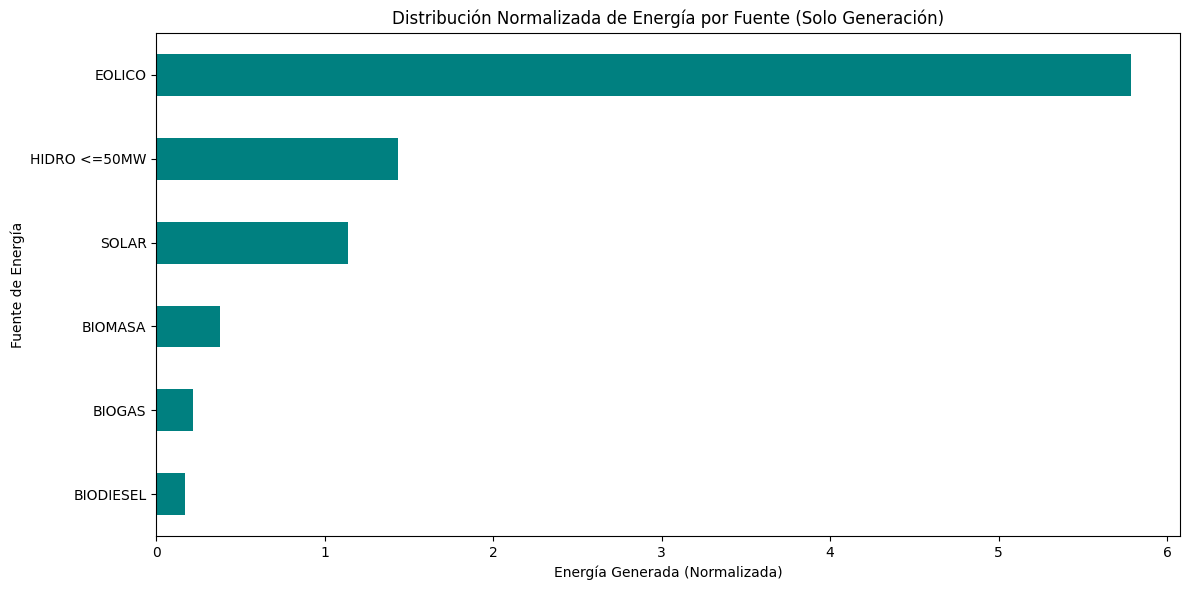

In [26]:
# 1. Distribuci칩n de energ칤a por fuente
# Filtrar los datos para excluir la 'Demanda'
df_generacion = df[df['tipo_generacion'] != 'Demanda']
plt.figure(figsize=(12, 6))
df_generacion.groupby('fuente_energia')['energia_generada_gwh'].sum().sort_values().plot(
    kind='barh', color='teal')
plt.title('Distribuci칩n Normalizada de Energ칤a por Fuente (Solo Generaci칩n)')
plt.xlabel('Energ칤a Generada (Normalizada)')
plt.ylabel('Fuente de Energ칤a')
plt.tight_layout()
plt.show()


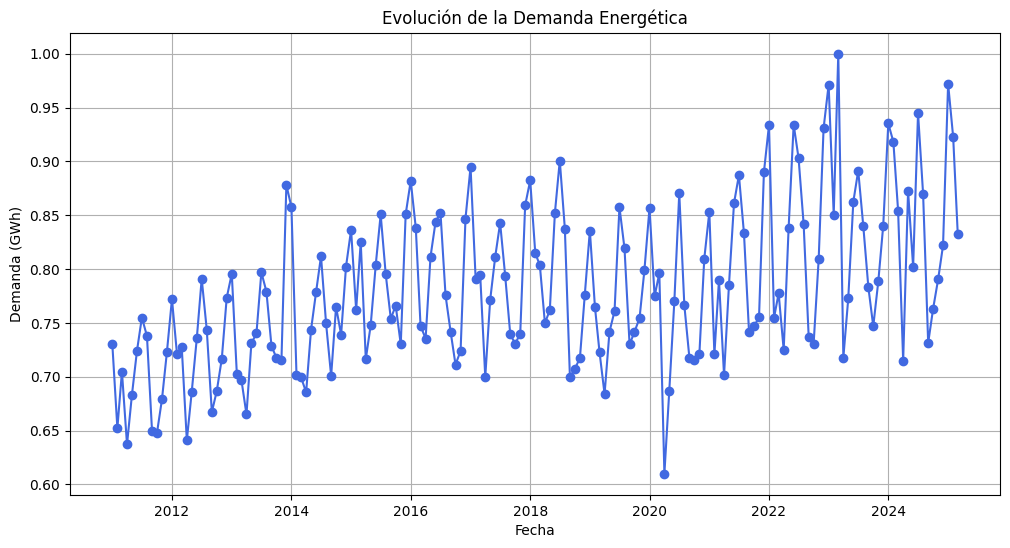

In [ ]:
# 2. Tendencia temporal de demanda
demanda = df[df['tipo_generacion'] == 'Demanda']
plt.figure(figsize=(12, 6))
plt.plot(demanda['fecha'], demanda['energia_generada_gwh'],
         marker='o', linestyle='-', color='royalblue')
plt.title('Evoluci칩n de la Demanda Energ칠tica')
plt.xlabel('Fecha')
plt.ylabel('Demanda (GWh)')
plt.grid(True)
plt.show()

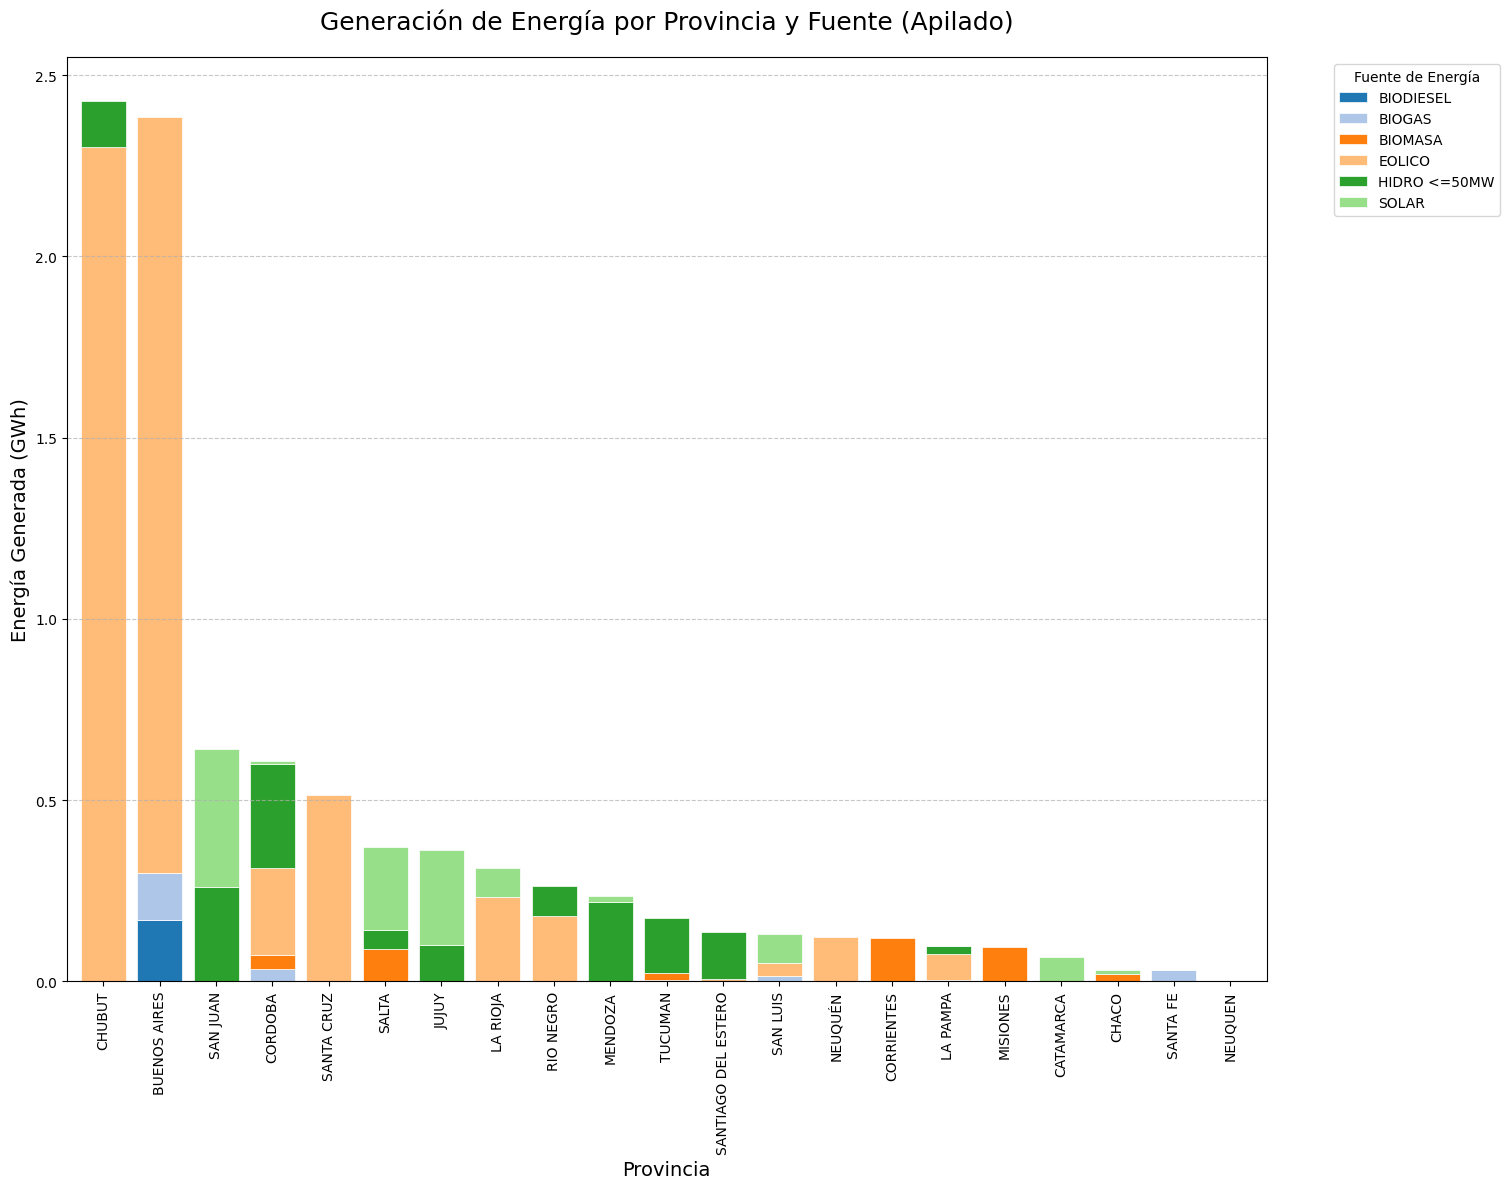

In [ ]:
# 3. Generaci칩n por provincia y fuente
# Filtrar solo generaci칩n (excluir demanda) y agrupar
generacion_provincia_fuente = df[df['tipo_generacion'] != 'Demanda'].groupby(
    ['provincia', 'fuente_energia']
)['energia_generada_gwh'].sum().reset_index()

# Convertir a formato wide para el gr치fico apilado
generacion_pivot = generacion_provincia_fuente.pivot(
    index='provincia',
    columns='fuente_energia',
    values='energia_generada_gwh'
).fillna(0)  # Rellenar NaN con 0

# Ordenar las provincias por generaci칩n total
generacion_pivot['Total'] = generacion_pivot.sum(axis=1)
generacion_pivot = generacion_pivot.sort_values('Total', ascending=False).drop('Total', axis=1)

# Crear el gr치fico de barras apiladas
plt.figure(figsize=(18, 12)) # Aumentar tama침o del gr치fico para mejor visibilidad de etiquetas

# Seleccionar una paleta de colores adecuada
colores = sns.color_palette('tab20', n_colors=len(generacion_pivot.columns)) # Usar 'tab20' que tiene m치s colores distintos

# Graficar
ax = generacion_pivot.plot(
    kind='bar',
    stacked=True,
    color=colores,
    width=0.8,  # Ancho de las barras
    edgecolor='white',  # Borde blanco para separar segmentos
    linewidth=0.5,
    ax=plt.gca() # Usar el eje actual para mayor control
)

# Personalizar el gr치fico
plt.title('Generaci칩n de Energ칤a por Provincia y Fuente (Apilado)', fontsize=18, pad=20)
plt.xlabel('Provincia', fontsize=14)
plt.ylabel('Energ칤a Generada (GWh)', fontsize=14)
plt.xticks(rotation=90, ha='center', fontsize=10)  # Rotar 90 grados y centrar etiquetas para evitar solapamiento
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7) # A침adir l칤neas de grid en el eje Y

# Mover la leyenda fuera del 치rea del gr치fico y ajustar su posici칩n
plt.legend(
    title='Fuente de Energ칤a',
    bbox_to_anchor=(1.05, 1), # Posicionar la leyenda a la derecha
    loc='upper left',
    fontsize=10,
    frameon=True, # Mostrar el marco de la leyenda
    facecolor='white' # Fondo blanco para la leyenda
)

# Ajustar m치rgenes para hacer espacio para la leyenda y etiquetas rotadas
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajustar el 치rea del gr치fico para dejar espacio a la derecha

# Mostrar el gr치fico
plt.show()

<ipython-input-15-3764eb3d5a9e>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='fecha', freq='M'))['energia_generada_gwh'].sum()
<ipython-input-15-3764eb3d5a9e>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  demanda_mensual = demanda.groupby(pd.Grouper(key='fecha', freq='M'))['energia_generada_gwh'].sum()


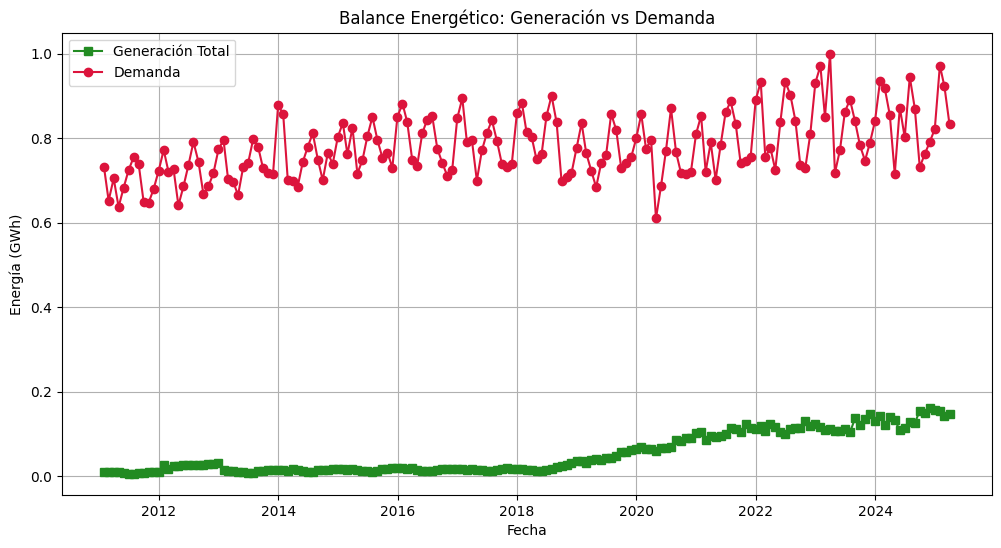

In [ ]:
# 4. Comparaci칩n generaci칩n vs demanda
generacion_mensual = df[df['tipo_generacion'] != 'Demanda'].groupby(
    pd.Grouper(key='fecha', freq='M'))['energia_generada_gwh'].sum()
demanda_mensual = demanda.groupby(pd.Grouper(key='fecha', freq='M'))['energia_generada_gwh'].sum()

plt.figure(figsize=(12, 6))
plt.plot(generacion_mensual.index, generacion_mensual,
         label='Generaci칩n Total', marker='s', color='forestgreen')
plt.plot(demanda_mensual.index, demanda_mensual,
         label='Demanda', marker='o', color='crimson')
plt.title('Balance Energ칠tico: Generaci칩n vs Demanda')
plt.xlabel('Fecha')
plt.ylabel('Energ칤a (GWh)')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-27-9858c2d07417>:50: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(mapa_merged.geometry.centroid.x, mapa_merged.geometry.centroid.y, mapa_merged['nombre']):


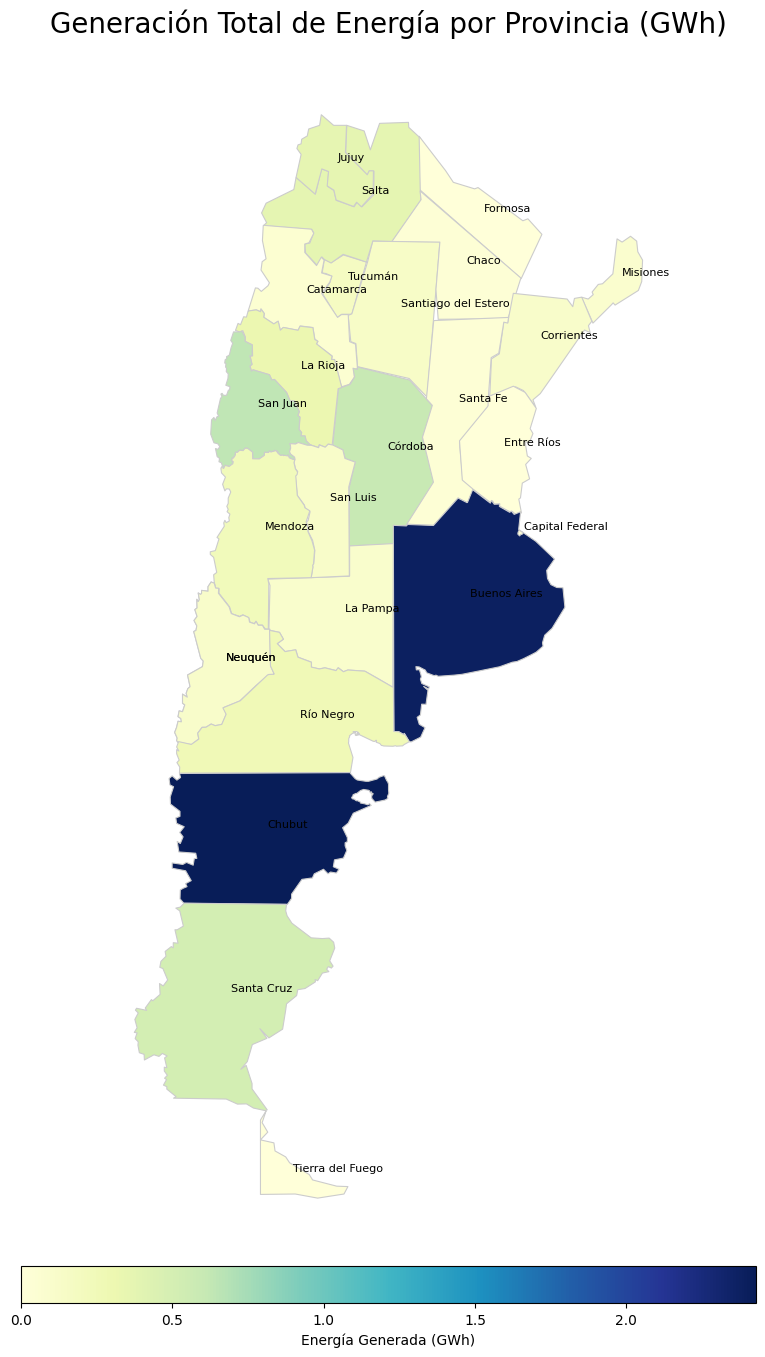

In [27]:
# 5. Mapa de Generaci칩n Total de Energia por Provincia
import geopandas as gpd
# Cargar mapa de provincias de Argentina

mapa = gpd.read_file("/content/drive/MyDrive/Dataset INGENIAS/ProvinciasArgentina.geojson")

# Calcular la generaci칩n total por provincia
gen_por_prov = df[df['tipo_generacion'] != 'Demanda'].groupby('provincia')['energia_generada_gwh'].sum().reset_index()

mapa['nombre_upper'] = mapa['nombre'].str.upper().str.replace('츼', 'A').str.replace('칄', 'E').str.replace('칈', 'I').str.replace('칍', 'O').str.replace('칔', 'U')
gen_por_prov['provincia_upper'] = gen_por_prov['provincia'].str.upper().str.replace('츼', 'A').str.replace('칄', 'E').str.replace('칈', 'I').str.replace('칍', 'O').str.replace('칔', 'U')

# Merge del mapa con los datos usando la columna unificada
mapa_merged = mapa.merge(gen_por_prov, how='left', left_on='nombre_upper', right_on='provincia_upper')

# Rellenar las provincias sin datos con 0 para que se muestren en el mapa
mapa_merged['energia_generada_gwh'] = mapa_merged['energia_generada_gwh'].fillna(0)

# Graficar
fig, ax = plt.subplots(1, 1, figsize=(15, 15)) # Aumentar el tama침o del mapa para mejor visualizaci칩n

cmap_elegido = 'YlGnBu'

# Plotear el mapa con las provincias coloreadas por la generaci칩n de energ칤a
mapa_merged.plot(
    column='energia_generada_gwh',
    cmap=cmap_elegido,
    linewidth=0.8,
    edgecolor='0.8', # Color del borde de las provincias
    legend=True, # Mostrar la barra de color
    ax=ax,
    # Barra de color
    legend_kwds={
        'label': "Energ칤a Generada (GWh)",
        'orientation': "horizontal", # Orientaci칩n horizontal de la barra
        'pad': 0.01, # Espacio entre el mapa y la barra de color
        'shrink': 0.5 # Reducir el tama침o de la barra de color
    }
)

# A침adir t칤tulos y ajustar visualmente
ax.set_title(
    'Generaci칩n Total de Energ칤a por Provincia (GWh)',
    fontsize=20,
    pad=20 # Espacio entre el t칤tulo y el mapa
)
ax.set_axis_off() # Ocultar los ejes (coordenadas)

# A침adir etiquetas de provincia
for x, y, label in zip(mapa_merged.geometry.centroid.x, mapa_merged.geometry.centroid.y, mapa_merged['nombre']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

# Asegurar que el mapa ocupa todo el espacio disponible en la figura
plt.tight_layout()

# Mostrar el mapa
plt.show()

Este an치lisis explora los datos de generaci칩n de energ칤a renovable, ofreciendo las siguientes conclusiones:

1. **Distribuci칩n de Energ칤a por Fuente:** Se muestra la cantidad total de energ칤a generada por cada fuente renovable. Esto permite identificar las fuentes dominantes y comprender la diversificaci칩n de la matriz energ칠tica.

2. **Tendencia de la Demanda Energ칠tica:** Se visualiza la evoluci칩n de la demanda de energ칤a a lo largo del tiempo.  Esta informaci칩n es crucial para planificar la generaci칩n y asegurar el suministro.  Se observa la tendencia (creciente, decreciente, o estable) de la demanda.

3. **Generaci칩n por Provincia y Fuente:** Se analiza la generaci칩n de energ칤a por provincia y por fuente, lo que ayuda a identificar las regiones con mayor potencial para cada tipo de energ칤a renovable y a comprender las particularidades geogr치ficas de la generaci칩n.

4. **Balance Energ칠tico (Generaci칩n vs. Demanda):**  Se compara la generaci칩n total de energ칤a con la demanda. Este gr치fico es fundamental para evaluar si la generaci칩n cubre la demanda o si existe un d칠ficit.  Muestra si la generaci칩n est치 alineada con las necesidades del consumo, o si hay periodos de excedente o escasez de energ칤a.

5. **Mapa de Generaci칩n Total de Energia por Provincia:**
El mapa de generaci칩n total de energ칤a por provincia permite visualizar espacialmente la distribuci칩n de la generaci칩n energ칠tica en Argentina. Las provincias con colores m치s intensos son aquellas que tienen una mayor producci칩n de energ칤a. Esta representaci칩n geogr치fica es fundamental para:
- Identificar las principales zonas de producci칩n energ칠tica del pa칤s.
- Comprender la contribuci칩n relativa de cada provincia a la matriz energ칠tica nacional.
- Planificar la expansi칩n de infraestructuras de generaci칩n y transmisi칩n de energ칤a, priorizando las 치reas de alta producci칩n o con potencial de crecimiento.
- Analizar las disparidades regionales en la generaci칩n de energ칤a y desarrollar pol칤ticas espec칤ficas para fomentar la generaci칩n en 치reas con menor desarrollo.